In [5]:
import os
os.getcwd()
#os.chdir('/Users/....')

'/Users/clairesun/Desktop/Sales_Forecast'

In [6]:
os.chdir('/Users/clairesun/desktop/Sales_Forecast')

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('sales_train_v2.csv')

In [8]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [9]:
df_fbprophet = df.loc[(df['item_cnt_day']>0)&
                                (df['item_id']==969) &
                               (df['date_block_num']<34)]

df_fbprophet = df_fbprophet.drop(['date_block_num','shop_id','item_id','item_price'],axis=1)

df_fbprophet

,date,item_cnt_day
1706796,14.06.2014,1.0
1706797,15.06.2014,1.0
1706798,22.06.2014,2.0
1707992,11.06.2014,1.0
1707993,12.06.2014,1.0
1707994,18.06.2014,1.0
1707995,23.06.2014,1.0
1711534,15.06.2014,1.0
1711535,18.06.2014,1.0
1711536,30.06.2014,1.0


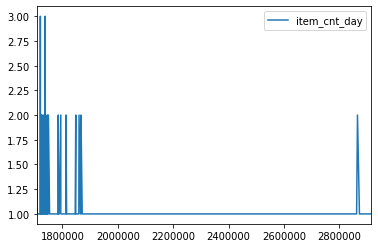

In [10]:
df_fbprophet.plot(kind='line')

In [15]:
my_model = Prophet(interval_width=0.95)

In [16]:
df_fbprophet = df_fbprophet.rename(columns={'date': 'ds',
                        'item_cnt_day': 'y'})
df_fbprophet

,ds,y
1706796,14.06.2014,1.0
1706797,15.06.2014,1.0
1706798,22.06.2014,2.0
1707992,11.06.2014,1.0
1707993,12.06.2014,1.0
1707994,18.06.2014,1.0
1707995,23.06.2014,1.0
1711534,15.06.2014,1.0
1711535,18.06.2014,1.0
1711536,30.06.2014,1.0


In [17]:
my_model = Prophet(daily_seasonality=True)
my_model.fit(df_fbprophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [18]:
future1 = my_model.make_future_dataframe(periods=30)
forecast1 = my_model.predict(future1)
forecast1.tail().T

,304,305,306,307,308
ds,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00
trend,0.843038,0.842775,0.842513,0.842251,0.841988
yhat_lower,0.494963,0.586665,0.572323,0.581907,0.509761
yhat_upper,1.28395,1.34864,1.34188,1.34705,1.284
trend_lower,0.842998,0.842733,0.842468,0.842204,0.841938
trend_upper,0.843071,0.842812,0.842552,0.842292,0.842033
additive_terms,0.0576122,0.124987,0.12642,0.122839,0.0471303
additive_terms_lower,0.0576122,0.124987,0.12642,0.122839,0.0471303
additive_terms_upper,0.0576122,0.124987,0.12642,0.122839,0.0471303
daily,0.113679,0.113679,0.113679,0.113679,0.113679


In [19]:
forecast = my_model.predict(forecast1)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
304,2016-01-04,0.900650,0.508106,1.294645
305,2016-01-05,0.967763,0.557403,1.352081
306,2016-01-06,0.968933,0.577283,1.367127
307,2016-01-07,0.965089,0.574321,1.339602
308,2016-01-08,0.889119,0.486692,1.266505


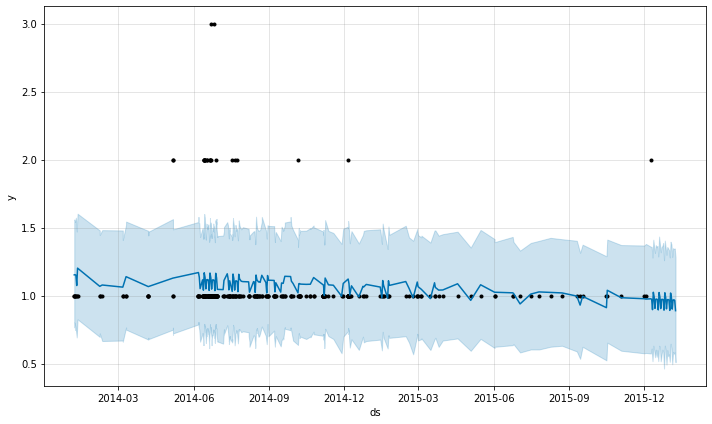

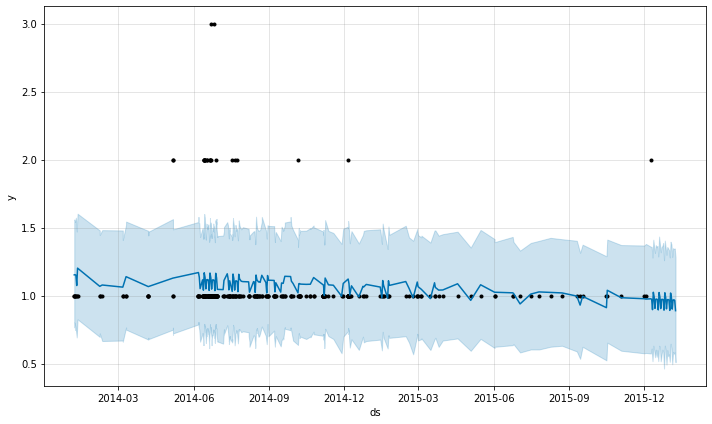

In [20]:
my_model.plot(forecast1,
              uncertainty=True)

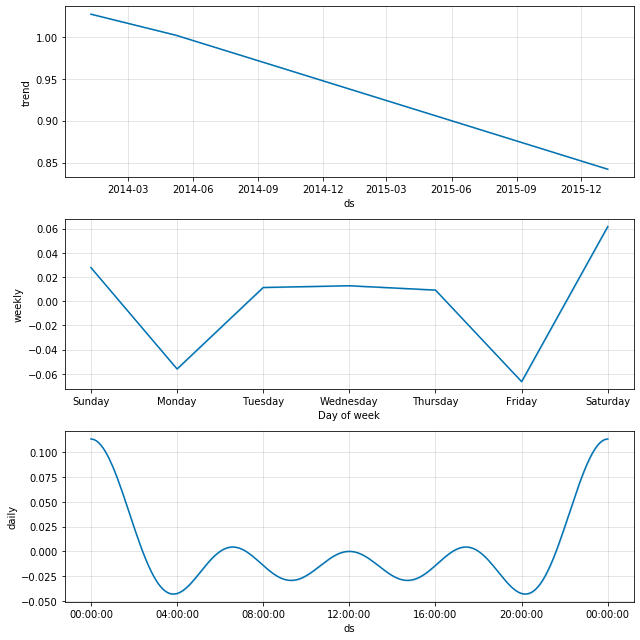

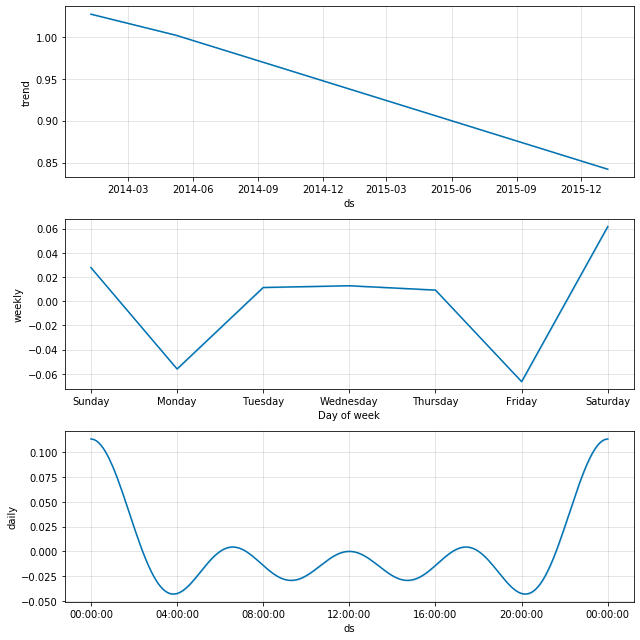

In [21]:
my_model.plot_components(forecast1)